In [1]:
import sys
import os

import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skewnorm, t, chi2, gamma
from scipy.stats import kstest
import json

from qiskit.synthesis import LieTrotter
from qiskit.transpiler import CouplingMap
from qiskit_addon_utils.problem_generators import generate_xyz_hamiltonian
from qiskit_addon_utils.problem_generators import generate_time_evolution_circuit
from qiskit.quantum_info import SparsePauliOp

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'utils'))
if src_path not in sys.path:
    sys.path.append(src_path)

from qiskit_addon_obp.classical_shadows import run_shadow, calculate_shadow_sample_complexity
from qiskit_addon_obp.run import run_many, obp_protocol
from qiskit_addon_obp.obp import run_backpropagation

/var/folders/zw/x8tsqxcx3lzdfvcr_bhldgg80000gn/T/ipykernel_26371/1253413164.py:14: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit.synthesis import LieTrotter
/Users/kevindougherty/Documents/GitHub/qiskit-addon-obp/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data2'))

In [40]:
depth1_df = pd.read_pickle(f'{data_path}/depth_data_1.pkl')
depth3_df = pd.read_pickle(f'{data_path}/depth_data_3.pkl')

# depth_df

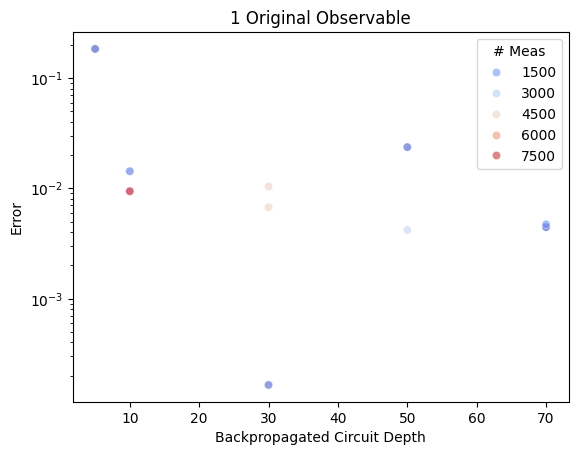

In [64]:
# gb1 = pw7_9obs.groupby('obs_group').agg({'abs_total_error': 'mean', 'num_meas': 'mean'}).reset_index()
# gb2 = mixed_pw7_9obs.groupby('obs_group').agg({'abs_total_error': 'mean', 'num_meas': 'mean'}).reset_index()
# gb3 = test_df.groupby('obs_group').agg({'abs_total_error': 'mean', 'num_meas': 'mean'}).reset_index()

# gb_obp = obp_res.groupby('obp_shots').agg({'abs_bp_error': 'mean'}).reset_index()
# gb_obp['obp_shots'] = gb_obp['obp_shots'] * obs_num

# gb_shad = shad_res.groupby('num_meas').agg({'abs_shad_error': 'mean'}).reset_index()
# gb_shad = gb_shad[gb_shad['num_meas'] >= 10]

sns.scatterplot(data=depth1_df, x='bp_circuit_depth', y='abs_total_error', alpha=0.6, hue='num_meas', palette='coolwarm')

# plt.scatter(x=gb_obp['obp_shots']*9, y=gb_obp['abs_bp_error'], label='OBP', alpha=0.6)
# plt.scatter(x=gb3['num_meas'], y=gb3['abs_shad_error'], label='Shadow on Initial', alpha=0.6, color='green')

# plt.xscale('log')
plt.yscale('log')
plt.title('1 Original Observable')
plt.xlabel('Backpropagated Circuit Depth')
plt.ylabel('Error')

plt.legend(title='# Meas')

You need to have the number of measurements displayed somehwere because this will naturally vary depending on the number of backpropagated observables, which depends on the backpropagated depth.

Text(0, 0.5, 'Error')

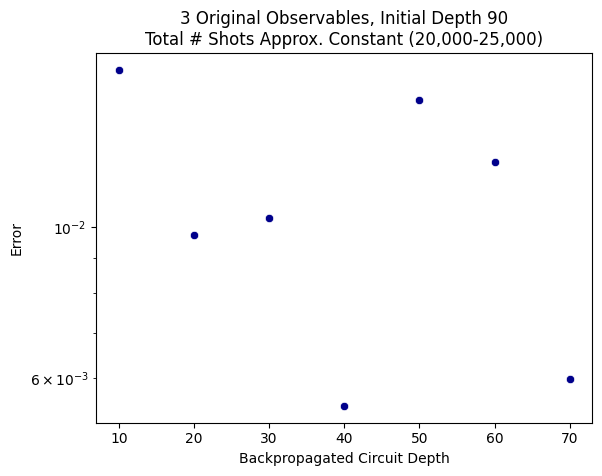

In [112]:
depth3_df = pd.read_pickle(f'{data_path}/depth_data_3.pkl')

obs_num = 3
depth3_df['obs_group'] = depth3_df.index // obs_num

gb1 = depth3_df.groupby('obs_group').agg({'abs_total_error': 'mean', 'num_meas': 'mean', 'bp_circuit_depth': 'mean'}).reset_index()
gb1 = gb1[(gb1['num_meas'] < 25000) & (gb1['num_meas'] > 20000)]

sns.scatterplot(data=gb1, x='bp_circuit_depth', y='abs_total_error', c='darkblue')

plt.yscale('log')
plt.title('3 Original Observables, Initial Depth 90\nTotal # Shots Approx. Constant (20,000-25,000)')
plt.xlabel('Backpropagated Circuit Depth')
plt.ylabel('Error')

# plt.legend(title='# Shots')

Text(0, 0.5, 'Error')

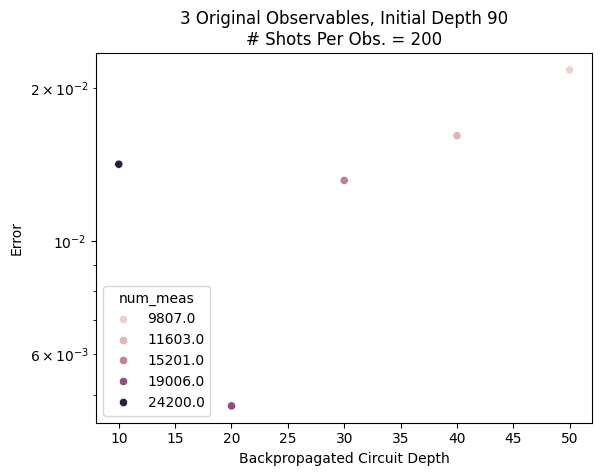

In [111]:
depth3_df = pd.read_pickle(f'{data_path}/depth_const_meas_per_data_3.pkl')

obs_num = 3
depth3_df['obs_group'] = depth3_df.index // obs_num

gb1 = depth3_df.groupby('obs_group').agg({'abs_total_error': 'mean', 'num_meas': 'mean', 'bp_circuit_depth': 'mean'}).reset_index()

sns.scatterplot(data=gb1, x='bp_circuit_depth', y='abs_total_error', c='darkblue', hue='num_meas')

plt.yscale('log')
plt.title('3 Original Observables, Initial Depth 90\n# Shots Per Obs. = 200')
plt.xlabel('Backpropagated Circuit Depth')
plt.ylabel('Error')

# plt.legend(title='# Shots')

In [ ]:
# we can add in two points at each depth for statevector and for obp shots estimation